# Análise Exploratória de Dados - Desafio indicium

![Indicium logo](https://indicium.ai/wp-content/uploads/2025/03/Logo-white-word-mark.png)








A indicium lançou um desafio para os candidatos ao programa lighthouse que consiste em realizar uma análise exploratória de dados para um cliente fictício. O cliente, *PProductions*, seria um estúdio de Hollywood e pede para que seja feita uma análise a partir de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Para auxiliar nisso, foram realizadas uma série de perguntas.  


    

# 1. Análise Exploratória de Dados (EDA)

A análise exploratória de dados ajuda a compreender a estrutura dos dados, identificar padrões e formular hipóteses.
O primeiro passo é carregar e tratar os dados para realizar uma análise das variáveis.


In [3]:
import pandas as pd


# definindo um estilo visual mais agradável para os gráficos
sns.set_style("whitegrid")

# leitura do conjunto de dados
arquivo = "desafio_indicium_imdb.csv"
df = pd.read_csv(arquivo)

In [4]:
# limpeza da coluna 'Gross'
# verifica se a coluna é do tipo 'object' (texto) antes de tentar substituir
if df['Gross'].dtype == 'object':
    df['Gross'] = df['Gross'].str.replace(',', '', regex=True)
    # 'errors='coerce'' transforma valores em NaN 
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# tratamento de valores ausentes
# remove as linhas onde o faturamento ('Gross') é nulo, para não distorcer as análises
df_clean = df.dropna(subset=['Gross']).copy()

# agrupando por gênero e calculando a média de faturamento
avg_gross_by_genre = df_clean.groupby('Genre')['Gross'].mean().sort_values(ascending=False).nlargest(10)

## 2.a Qual filme você recomendaria para uma pessoa que você não conhece?


O filme que eu recomendaria para qualquer pessoa maior de idade é [Das Leben der Anderen](https://www.imdb.com/pt/title/tt0405094/) (em inglês, The Lives of Others,
no Brasil: A Vida dos Outros) é um filme alemão lançado em 2006 escrito e dirigido por Florian Henckel 
von Donnersmarck, foi premiado com o Oscar de melhor filme estrangeiro. Para crianças eu recomendaria [Grave of the Fireflies](https://www.imdb.com/pt/title/tt0095327/?ref_=nv_sr_srsg_0_tt_8_nm_0_in_0_q_grave) (Túmulo
dos vagalumes) do studio Ghibli.



## 2.b Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?


Vários fatores influenciam na expectativa de faturamento de um filme. Um fator muito importante é a 
presença de talentos consagrados. Diretores renomados ou atores e atrizes famosos favorecem uma expectativa de
faturamento mais alto. Outros fatores como o orçamento e a qualidade da produção também influenciam bastante,
assim como o marketing e a divulgação. Campanhas publicitárias de sucesso podem fazer a diferença na bilheteria
de estreia. Outro fator que também pode influenciar é se o filme faz parte de uma franquia de sucesso. Franquias
conhecidas já possuem uma ampla base de fãs, o que pode contribuir para o sucesso da película. Um filme recente
que teve muito sucesso de bilheteria e combinou todos esses fatores foi o filme ["Deadpool & Wolverine"](https://www.imdb.com/pt/title/tt6263850/) de 2024.
Depois de uma campanha de marketing muito bem sucedida, contando com a presença de atores consagrados e uma 
produção de qualidade o filme alcançou mais de US$ 1 bilhão em bilheteria mundial, ultrapassando "Coringa" 
como o filme R-rated de maior bilheteria da história. 


### A seguir estão algumas correlações entre diversos fatores e o faturamento de um filme com base nos dados fornecidos

Primeiro, a relação entre o gênero do filme e o faturamento, seguida da relação entre a avaliação no IMDB e o faturamento.


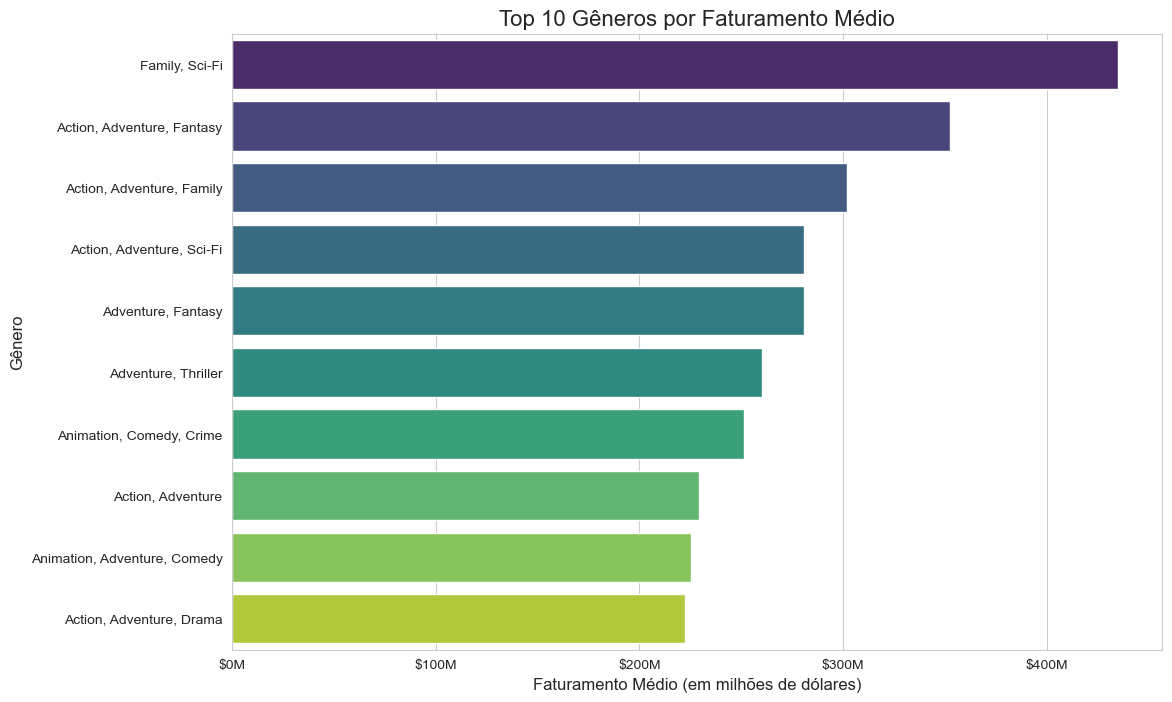

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
# gráfico de barras (barplot), ideal para comparar médias
barplot = sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index, orient='h', palette='viridis', hue=avg_gross_by_genre.index, legend=False)

plt.title('Top 10 Gêneros por Faturamento Médio', fontsize=16)
plt.xlabel('Faturamento Médio (em milhões de dólares)', fontsize=12)
plt.ylabel('Gênero', fontsize=12)

# formatando o eixo X para melhor leitura
barplot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e6:.0f}M'))
plt.show()

Correlação geral entre Avaliação IMDB e Faturamento: 0.0994


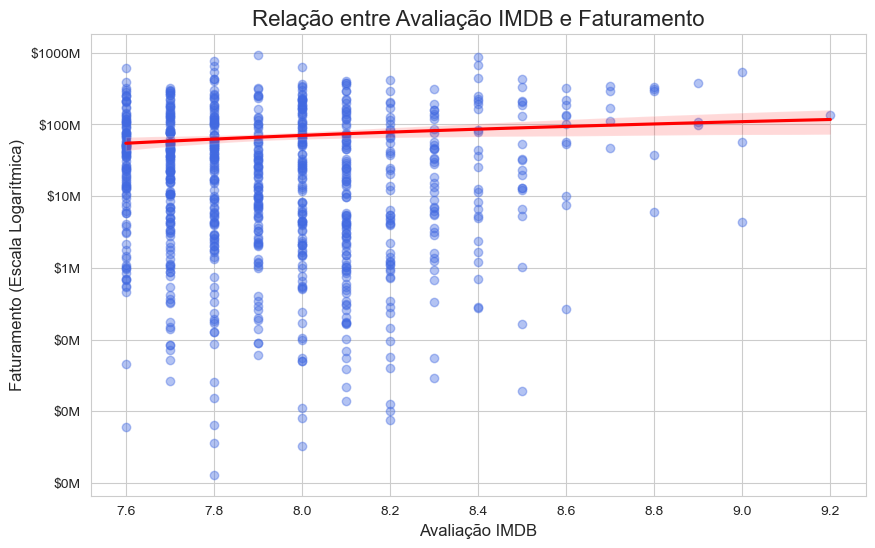

In [5]:
# cálculo do coeficiente de correlação de Pearson
correlation = df_clean['IMDB_Rating'].corr(df_clean['Gross'])
print(f"Correlação geral entre Avaliação IMDB e Faturamento: {correlation:.4f}")

# gráfico de dispersão com linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='IMDB_Rating', y='Gross',
            scatter_kws={'alpha':0.4, 'color':'royalblue'}, line_kws={'color':'red'})

plt.title('Relação entre Avaliação IMDB e Faturamento', fontsize=16)
plt.xlabel('Avaliação IMDB', fontsize=12)
plt.ylabel('Faturamento (Escala Logarítmica)', fontsize=12)

# aplicando escala logarítmica no eixo Y para melhor visualização
plt.yscale('log')

# formatando o eixo Y
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1e6)}M'))
plt.show()

In [7]:
# criando uma cópia e separando os gêneros
df_genres_split = df_clean.copy()
df_genres_split['Genre'] = df_genres_split['Genre'].str.split(', ')
df_exploded = df_genres_split.explode('Genre') # transforma cada gênero em uma linha separada

# calculando a correlação para os 5 gêneros individuais mais comuns
top_genres = df_exploded['Genre'].value_counts().nlargest(5).index
corr_by_genre = df_exploded[df_exploded['Genre'].isin(top_genres)].groupby('Genre')[['IMDB_Rating', 'Gross']].corr().unstack().iloc[:, 1]

print("\nCorrelação (Avaliação IMDB vs Faturamento) por Gênero:")
print(corr_by_genre)


Correlação (Avaliação IMDB vs Faturamento) por Gênero:
Genre
Action       0.230982
Adventure    0.169983
Comedy      -0.011561
Crime        0.240279
Drama        0.193786
Name: (IMDB_Rating, Gross), dtype: float64


## 2.c Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

<div style="text-align: justify;">
A coluna "overview" dá um breve resumo de cada filme, basicamente uma sinopse. É possível usar técnicas de
processamento de linguagem natural (NLP) para extrair temas e palavras-chave que poderiam ajudar a estipular qual é o 
gênero do filme. Para isso, podemos treinar um modelo de Machine Learning utilizando a técnica de regressão logística
que ajuda a prever o gênero do filme, já que se trata de um problema de classificação multi-rótulo complexo. Por se 
tratar de um problema complexo a precisão do classificador não é muito elevada. Para melhorar o resultado, seriam necessárias
técnicas mais avançadas, como moelos de deep learning (como redes neurais recorrentes ou transformers). O principal insight
provavelmente é o fato de que a linguagem usada nos resumos contém padrões que estão relacionados aos gêneros dos filmes.
</div>

## Instalando as dependências necessárias para gerar uma núvem de palavras extraídas da coluna 'Overview'

In [9]:
pip install plotly wordcloud

Note: you may need to restart the kernel to use updated packages.


Acurácia do modelo para prever o gênero a partir do Overview: 10.50%


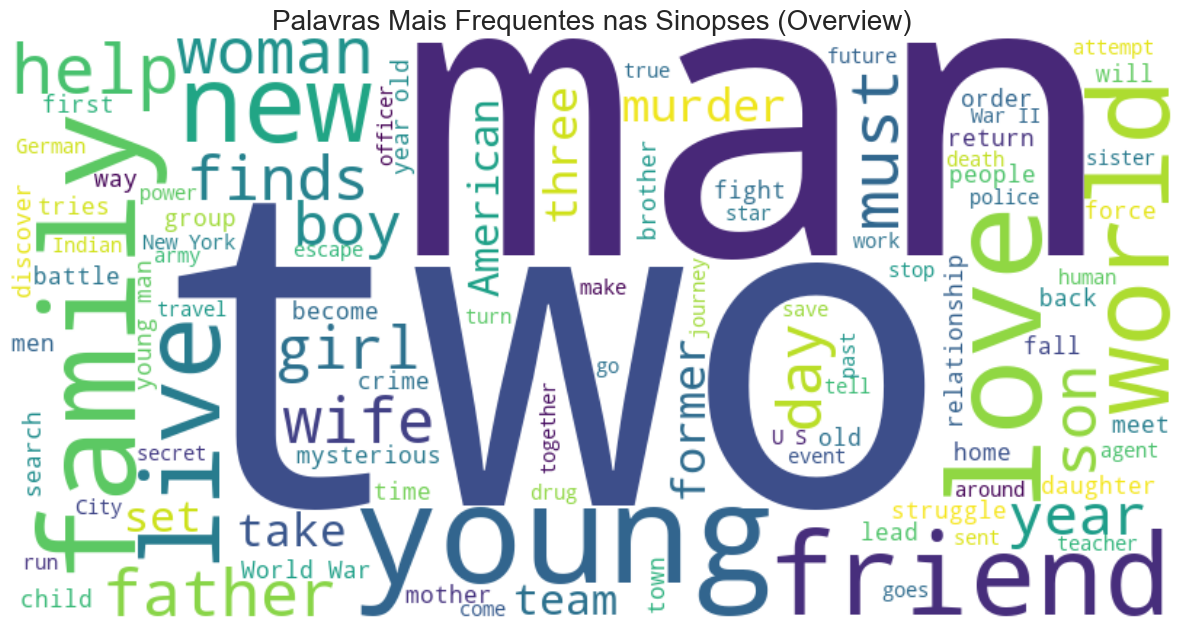

In [8]:
# preparando os dados para o modelo
# selecionando apenas filmes com overview e gênero definidos
df_nlp = df.dropna(subset=['Overview', 'Genre']).copy()

# separando os gêneros em listas
df_nlp['Genre_list'] = df_nlp['Genre'].str.split(', ')

# usando MultiLabelBinarizer para transformar as listas de gêneros em um formato binário
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df_nlp['Genre_list'])

# pré-processamento e Vetorização do texto
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X = tfidf.fit_transform(df_nlp['Overview'])

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# treinando o modelo de classificação multi-rótulo
# OneVsRestClassifier treina um classificador para cada classe (gênero)
logreg = LogisticRegression(solver='liblinear', random_state=42)
ovr_classifier = OneVsRestClassifier(logreg)
ovr_classifier.fit(X_train, y_train)

# avaliando a acurácia
y_pred = ovr_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# quais insights podem ser tirados da coluna overview?
print(f"Acurácia do modelo para prever o gênero a partir do Overview: {accuracy * 100:.2f}%")


from wordcloud import WordCloud, STOPWORDS

# juntando todas as sinopses em um único texto
text = " ".join(review for review in df_clean.Overview.dropna())

# definindo palavras a serem ignoradas (stopwords)
stopwords = set(STOPWORDS)
stopwords.update(["film", "movie", "character", "story", "life", "find", "one", "becomes"])

# criando a nuvem de palavras
wordcloud = WordCloud(
    stopwords=stopwords,
    background_color="white",
    width=800,
    height=400,
    max_words=100
).generate(text)

# exibindo a imagem
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras Mais Frequentes nas Sinopses (Overview)", fontsize=20)
plt.show()


# 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?


<div style="text-align: justify;">
A pergunta possui múltiplas partes então a resposta também terá que ser dada por partes. Primeiramente, que tipo de problema estamos resolvendo
(regressão, classificação)? 
Trata-se de um problema de regressão pois esse tipo de problema busca prever uma quantidade contínua e a nota do IMDB é
um valor numérico contínuo e.g. 7.6, 8.1, etc. Caso o objetivo fosse prever uma categoria, como "bom", "médio" ou "ruim", aí se trataria de um problema
de classificação.
Quais variáveis e/ou suas transformações você utilizou e por quê?
As variáveis que influenciam e podem influenciar na nota do IMDB são diversas, mas são cruciais para o sucesso do modelo.
Intuitivamente, selecionei as colunas com variáveis que parecem mais ter influência na avaliação de um filme.
</div>

Variáveis Selecionadas:

* Numéricas:

  - Meta_score: A nota dos críticos profissionais é, provavelmente, um dos preditores mais fortes da nota do público. É uma variável direta e poderosa.

  - No_of_Votes: Filmes com mais votos tendem a ser mais populares e a ter notas maiores. O volume de votos pode ser um indicador de relevância.

  - Gross: O faturamento pode ter uma correlação (mesmo que fraca) com a popularidade e, consequentemente, com a avaliação.

  - Released_Year: O ano de lançamento pode capturar tendências cinematográficas e mudanças na forma como o público avalia os filmes ao longo do tempo.

  - Runtime: A duração do filme também pode ter relação com a avaliação. 

* Categóricas:

  - Genre: O gênero é fundamental. Filmes de certos gêneros (como Drama e Crime) tendem a receber notas mais altas.

  - Director e Star1: Diretores e atores principais renomados podem influenciar positivamente a percepção e a avaliação de um filme.

  - Certificate: A classificação indicativa (A, UA, U, etc.) pode estar associada a certos tipos de filme e público, influenciando a nota.

<div style="text-align: justify;">
Para a utilização das variáveis será necessário, em muitos casos, realizar transformações para utilizá-las em 
modelos de machine learning. Isso é necessário porque modelos de machine learning utilizam apenas números
então é preciso realizar uma conversão de variáveis não-numéricas de modo a permitir seu uso dessa maneira.
</div>


<div style="text-align: justify;">
Tratamento de Nulos: A coluna Meta_score possui valores nulos. Uma estratégia comum é preenchê-los com a média 
ou mediana da coluna para não perder os dados das outras colunas daquela linha.
</div>


Limpeza Numérica: A coluna Runtime precisa ser convertida de texto para um número inteiro.

<div style="text-align: justify;">
One-Hot Encoding para Categóricas: Variáveis como Genre, Director, Star1 e Certificate são textuais. 
Para usá-las, é necessário criar colunas "dummy". Por exemplo, a coluna Genre será transformada em várias colunas 
como Genre_Action, Genre_Drama, etc., que terão valor 1 se o filme pertence àquele gênero e 0 caso contrário. 
Como Director e Star1 têm muitos valores únicos (alta cardinalidade), apliquei essa técnica apenas 
para os mais frequentes para evitar criar um número excessivo de colunas.
</div>

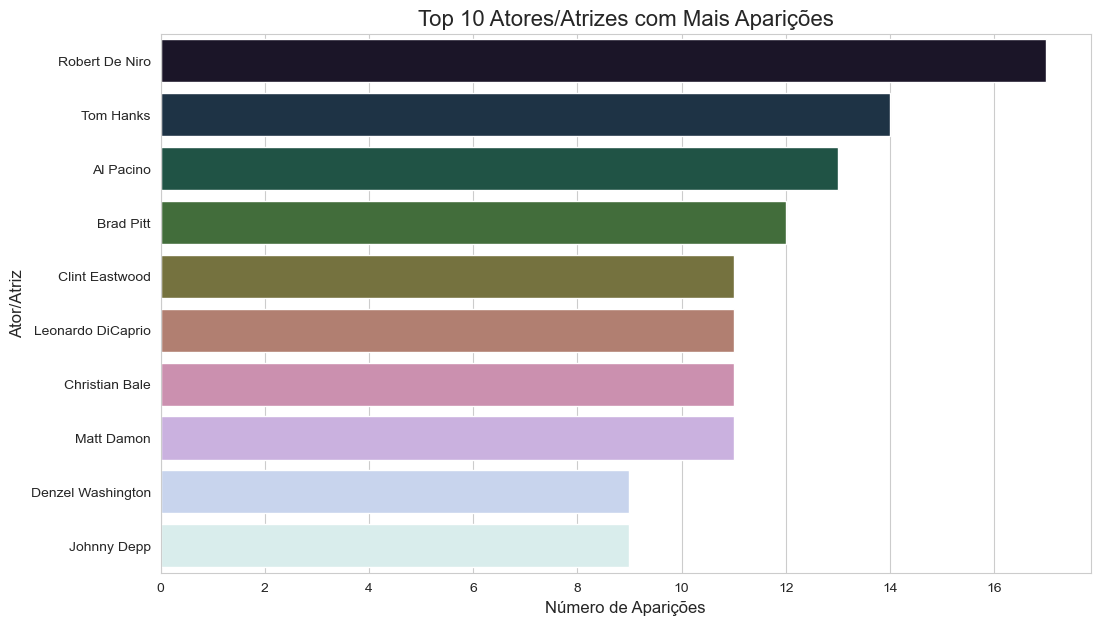

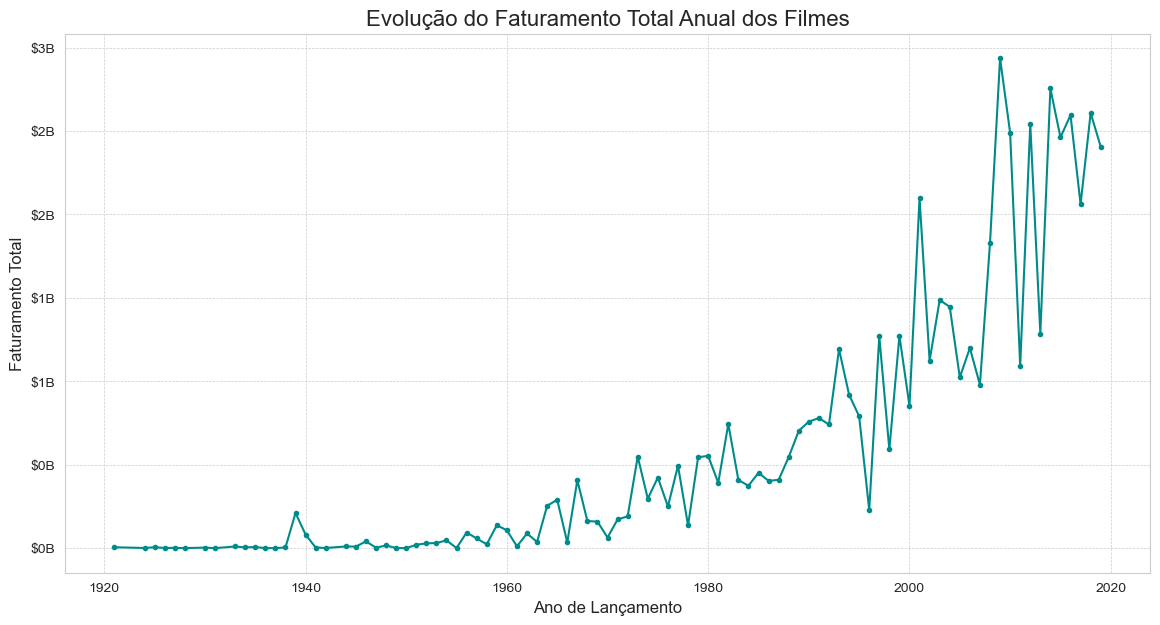

O ano com o maior faturamento médio foi 2018, com uma média de $186,268,383.00 por filme.


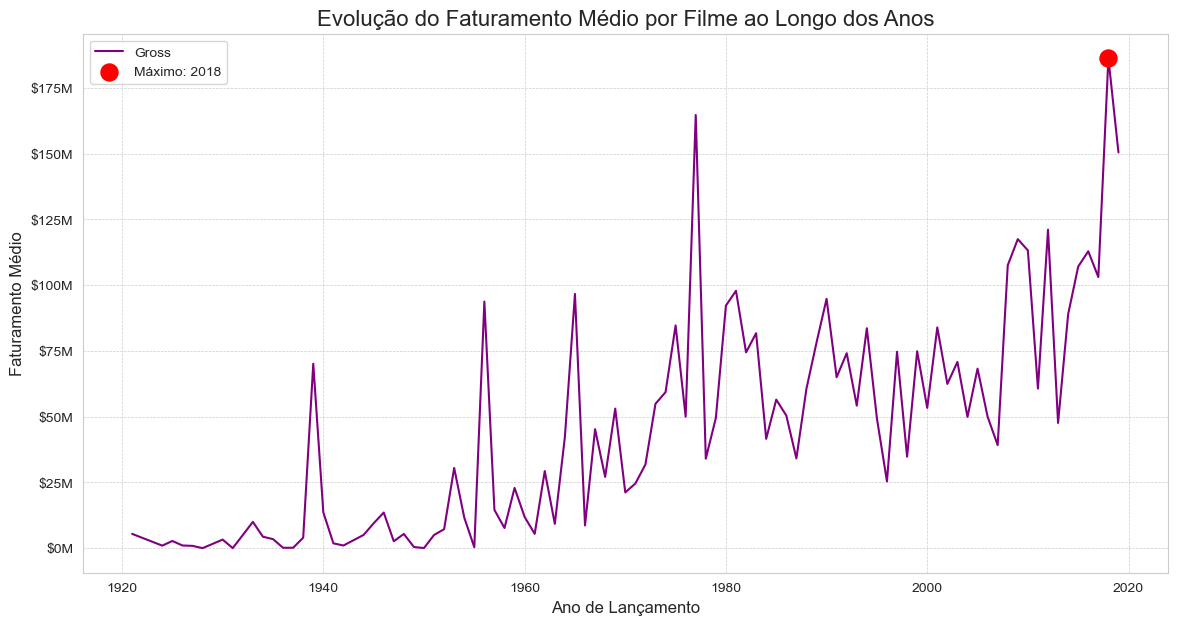

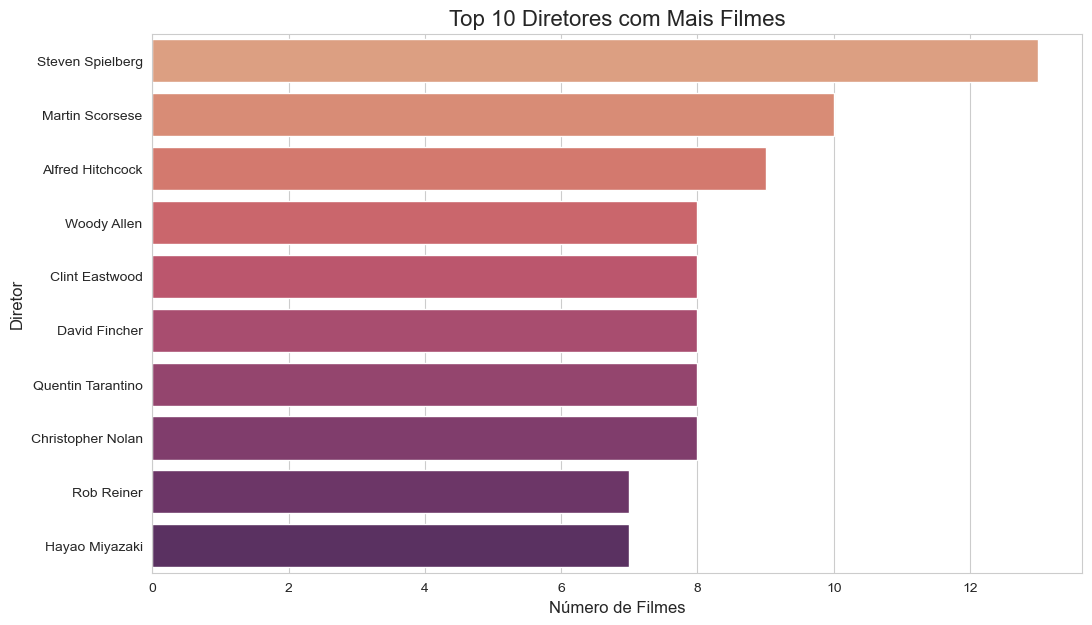

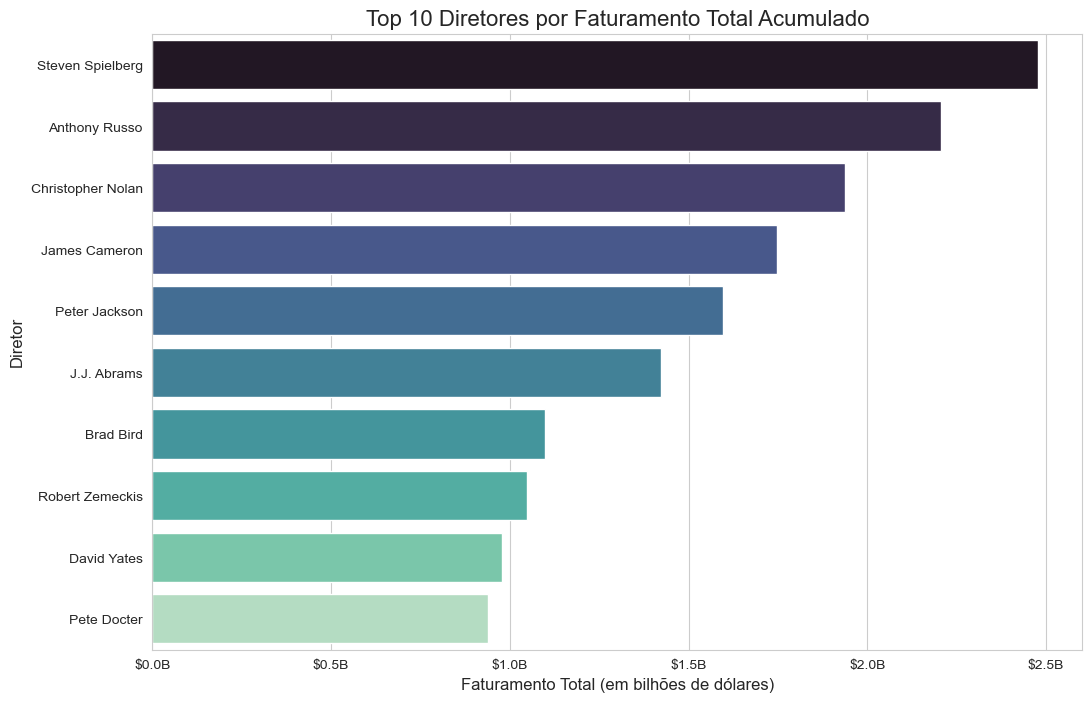

In [8]:
# juntando todas as colunas de estrelas em uma única série
star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
all_stars = pd.concat([df_clean[col] for col in star_cols])


top_10_actors = all_stars.value_counts().nlargest(10)

top_10_actors_df = top_10_actors.reset_index()
top_10_actors_df.columns = ['Actor', 'Appearances']
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_actors_df, x='Appearances', y='Actor', palette='cubehelix', hue='Actor', legend=False)
plt.title('Top 10 Atores/Atrizes com Mais Aparições', fontsize=16)
plt.xlabel('Número de Aparições', fontsize=12)
plt.ylabel('Ator/Atriz', fontsize=12)
plt.show()

# convertendo 'Released_Year' para tipo numérico, tratando possíveis erros
df_clean['Released_Year'] = pd.to_numeric(df_clean['Released_Year'], errors='coerce')
df_clean.dropna(subset=['Released_Year'], inplace=True) # Remove linhas onde a conversão falhou
df_clean['Released_Year'] = df_clean['Released_Year'].astype(int)

# agrupando por ano e somando o faturamento
gross_by_year = df_clean.groupby('Released_Year')['Gross'].sum()

plt.figure(figsize=(14, 7))
gross_by_year.plot(kind='line', marker='.', linestyle='-', color='darkcyan')
plt.title('Evolução do Faturamento Total Anual dos Filmes', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Faturamento Total', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1e9)}B')) # Em bilhões
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# agrupando por ano e calculando a média do faturamento
avg_gross_by_year = df_clean.groupby('Released_Year')['Gross'].mean()
year_highest_avg = avg_gross_by_year.idxmax()
value_highest_avg = avg_gross_by_year.max()

print(f"O ano com o maior faturamento médio foi {year_highest_avg}, com uma média de ${value_highest_avg:,.2f} por filme.")

# gráfico da evolução da média
plt.figure(figsize=(14, 7))
avg_gross_by_year.plot(kind='line', color='purple')
# destaque para o ponto máximo
plt.scatter(year_highest_avg, value_highest_avg, color='red', s=150, zorder=5, label=f'Máximo: {year_highest_avg}')

plt.title('Evolução do Faturamento Médio por Filme ao Longo dos Anos', fontsize=16)
plt.xlabel('Ano de Lançamento', fontsize=12)
plt.ylabel('Faturamento Médio', fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1e6)}M')) # Em milhões
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# top 10 diretores com mais filmes
top_10_directors = df_clean['Director'].value_counts().nlargest(10)
top_10_directors_df = top_10_directors.reset_index()
top_10_directors_df.columns = ['Director', 'Movie_Count']

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_directors_df, x='Movie_Count', y='Director', palette='flare', hue='Director', legend=False)
plt.title('Top 10 Diretores com Mais Filmes', fontsize=16)
plt.xlabel('Número de Filmes', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
plt.show()

# calculando o faturamento total por diretor
total_gross_by_director = df_clean.groupby('Director')['Gross'].sum().sort_values(ascending=False).nlargest(10)
total_gross_df = total_gross_by_director.reset_index()
total_gross_df.columns = ['Director', 'Total_Gross']

plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=total_gross_df, x='Total_Gross', y='Director', palette='mako', hue='Director', legend=False)

plt.title('Top 10 Diretores por Faturamento Total Acumulado', fontsize=16)
plt.xlabel('Faturamento Total (em bilhões de dólares)', fontsize=12)
plt.ylabel('Diretor', fontsize=12)
barplot.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${x/1e9:.1f}B'))
plt.show()




## Qual modelo melhor se aproxima dos dados e quais seus prós e contras?

Uma abordagem interessante é começar com um modelo simples (baseline) e depois testar um mais complexo.


  - Modelo Baseline: Regressão Linear (LinearRegression)

        Prós: É um modelo simples, rápido de treinar e muito interpretável. Podemos olhar para os coeficientes 
        de cada feature e entender qual o seu peso e direção (positiva ou negativa) na previsão da nota.

        Contras: Assume que a relação entre as variáveis e a nota do IMDB é linear, o que raramente é o caso 
        na realidade. Pode não capturar interações complexas entre as features.



  - Modelo Avançado: Random Forest Regressor (RandomForestRegressor)

        Prós: É um modelo baseado em árvores de decisão, muito poderoso e que não assume linearidade. 
        Consegue capturar relações complexas e interações entre as variáveis. 
        Geralmente, oferece uma performance muito superior à Regressão Linear e é menos sensível a outliers.

        Contras: É um modelo "caixa-preta" (black-box), sendo muito mais difícil de interpretar. 
        Não se sabe exatamente como ele combina as variáveis para chegar a uma previsão. 
        É também computacionalmente mais caro e lento para treinar.

Para este problema, o Random Forest Regressor provavelmente se ajustará melhor aos dados, 
dada a complexidade e as relações não-lineares que se espera encontrar.

## Qual medida de performance do modelo foi escolhida e por quê?

Para problemas de regressão, não se usa "Acurácia". As métricas mais comuns são:


  - Mean Absolute Error (MAE) - Erro Médio Absoluto:

        A média da diferença absoluta entre a nota real e a nota prevista pelo modelo.

        Por que escolher? É a métrica mais fácil de interpretar. Um MAE de 0.25, por exemplo, significa que, 
        em média, as previsões do modelo erram em 0.25 pontos da nota IMDB (para mais ou para menos). 
        É excelente para comunicar o resultado para um público não-técnico.



  - Root Mean Squared Error (RMSE) - Raiz do Erro Quadrático Médio:

        Similar ao MAE, mas eleva os erros ao quadrado antes de calcular a média e depois tira a raiz quadrada.

        Por que escolher? Ao elevar os erros ao quadrado, ele penaliza erros maiores de forma muito mais 
        significativa. É a métrica padrão em muitos contextos acadêmicos e de competição, sendo útil 
        se grandes erros na previsão são especialmente ruins para o seu caso de uso.

Para este projeto, escolhi o MAE como principal métrica pela sua fácil interpretação, mas também calculei
o RMSE para uma análise mais robusta.

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)


# --- PASSO 1: PREPARAÇÃO E LIMPEZA DOS DADOS ---

df_model = df.copy()

# definindo as colunas 
numeric_features = ['Meta_score', 'No_of_Votes', 'Gross', 'Released_Year', 'Runtime']
categorical_features = ['Genre', 'Director', 'Star1', 'Certificate']
target = 'IMDB_Rating'
# lista completa de features para selecionar no dataframe
features = numeric_features + categorical_features

# limpeza e conversão das colunas que podem ter formatos mistos
# gross: remover vírgulas
if df_model['Gross'].dtype == 'object':
    df_model['Gross'] = df_model['Gross'].str.replace(',', '', regex=True)

# runtime: remover ' min'
if df_model['Runtime'].dtype == 'object':
    df_model['Runtime'] = df_model['Runtime'].str.replace(' min', '', regex=False)

# convertendo todas as colunas numéricas para o tipo numérico.
# 'errors='coerce'' transforma qualquer valor que não seja um número em NaN.
for col in numeric_features:
    df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

# removemos as linhas onde a variável alvo (target) ou as features categóricas principais são nulas.
# os NaNs nas colunas numéricas (criados pelo 'coerce' ou já existentes)
# serão tratados pelo SimpleImputer dentro do pipeline.
df_model = df_model.dropna(subset=[target, 'Genre', 'Director', 'Star1', 'Certificate'])

# separando as features (X) da variável alvo (y)
X = df_model[features]
y = df_model[target]

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# --- PASSO 2: PRÉ-PROCESSAMENTO E CRIAÇÃO DO PIPELINE ---

numeric_transformer = SimpleImputer(strategy='median')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=20))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)


# --- PASSO 3: TREINAMENTO E AVALIAÇÃO DOS MODELOS ---

# modelo 1: regressão linear (Baseline)
lr_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("--- Resultados da Regressão Linear (Baseline) ---")
print(f"Erro Médio Absoluto (MAE): {mae_lr:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_lr:.4f}\n")


# modelo 2: Random Forest Regressor 
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# salvando modelo no formato pickle
import pickle

with open("modelo.pkl", "wb") as model:
    pickle.dump(rf_model, model)

# exibindo resultados
print("--- Resultados do Random Forest Regressor ---")
print(f"Erro Médio Absoluto (MAE): {mae_rf:.4f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse_rf:.4f}\n")

# conclusão da performance
print(f"O Random Forest foi superior, reduzindo o MAE em {((mae_lr - mae_rf)/mae_lr)*100:.2f}%.")
print(f"Em média, o modelo Random Forest erra a nota do IMDB em aproximadamente {mae_rf:.2f} pontos.")


--- Resultados da Regressão Linear (Baseline) ---
Erro Médio Absoluto (MAE): 0.1806
Raiz do Erro Quadrático Médio (RMSE): 0.2185

--- Resultados do Random Forest Regressor ---
Erro Médio Absoluto (MAE): 0.1625
Raiz do Erro Quadrático Médio (RMSE): 0.2056

O Random Forest foi superior, reduzindo o MAE em 10.05%.
Em média, o modelo Random Forest erra a nota do IMDB em aproximadamente 0.16 pontos.


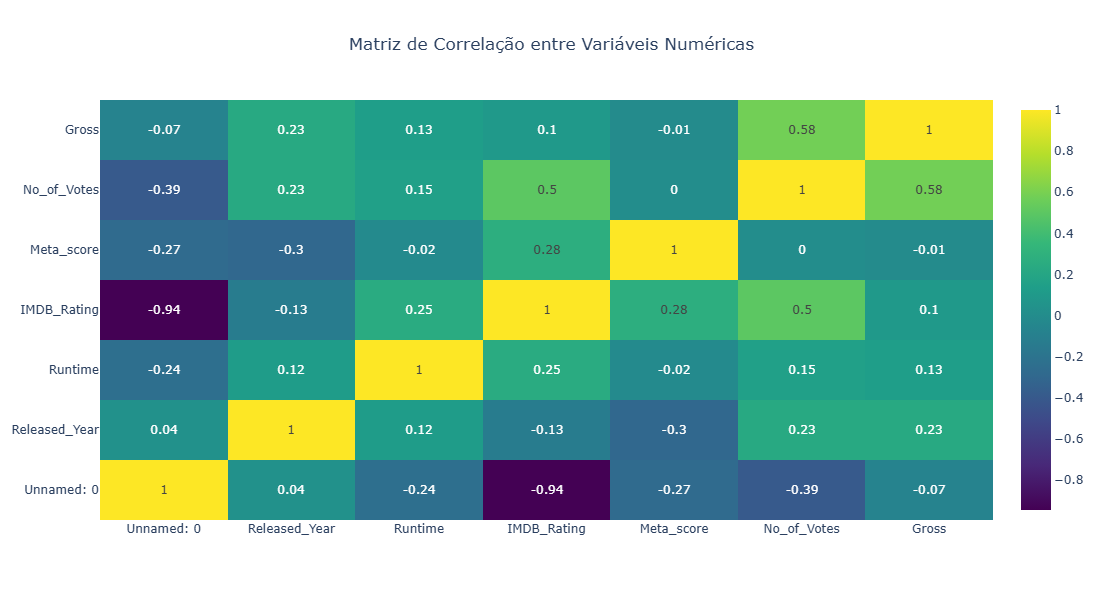

In [9]:
# para visualizar no github
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# ANÁLISE DE CORRELAÇÃO GERAL (matriz de correlação)

# selecionando apenas as colunas numéricas para a matriz de correlação
numeric_cols = df_model.select_dtypes(include=np.number)

# calculando a correlação
correlation_matrix = numeric_cols.corr()

# criando o heatmap interativo com Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    text=correlation_matrix.round(2).values, # mostra os valores de correlação
    texttemplate="%{text}"
))

fig.update_layout(
    title='Matriz de Correlação entre Variáveis Numéricas',
    title_x=0.5,
    height=600
)

fig.show()

# A Matriz de Correlação

O gráfico anterior é uma matriz de correlação, exibida como um *heatmap*(mapa de calor).
Ele serve para visualizar a direção da relação linear entre as variáveis do seu conjunto de dados.
Cada célula do gráfico exibe o **coeficiente de correlação de Pearson** entre duas variáveis, que varia de -1 a +1.

- Valores próximos de +1 (Cores claras/Amarelas): Indicam uma correlação positiva forte, ou seja, quando o valor de uma
variável aumenta, o valor da outra também tende a aumentar. E.g. A célula no cruzamento de No_of_Votes e Gross (faturamento)
tem um valor de 0.59, o que sugere que filmes com mais votos tendem a ter um faturamento maior.

- Valores próximos de -1 (Cores escuras/Roxas): Sugerem uma correlação negativa forte. Quando um valor aumenta, o valor da outra
variável tende a diminuir.

- Valores próximos de 0 (Cores verdes): Sugerem pouca ou nenhuma correlação linear. As variáveis não indicam ter uma relação linear clara entre si.
E.g. A relação entre o ano de lançamento e a nota do IMDB é -0.18, o que sugere uma correlação negativa fraca.

## 4. Supondo um filme com as seguintes características:

{'Series_Title': 'The Shawshank Redemption',
 'Released_Year': '1994',
 'Certificate': 'A',
 'Runtime': '142 min',
 'Genre': 'Drama',
 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
 'Meta_score': 80.0,
 'Director': 'Frank Darabont',
 'Star1': 'Tim Robbins',
 'Star2': 'Morgan Freeman',
 'Star3': 'Bob Gunton',
 'Star4': 'William Sadler',
 'No_of_Votes': 2343110,
 'Gross': '28,341,469'}


## Qual seria a nota do IMDB?


In [12]:
# 1. coletar e estruturar os dados do filme "Um Sonho de Liberdade"
# busquei os valores reais para uma previsão mais precisa.
dados_novo_filme = {
    'Meta_score': 82.0,                  # Fonte: Metacritic
    'No_of_Votes': 2736184,              # Fonte: IMDb (valor aproximado atual)
    'Gross': 28341469,                   # Fonte: Box Office Mojo (faturamento original)
    'Released_Year': '1994',
    'Runtime': '142',
    'Genre': 'Drama',
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Certificate': 'A'
}

# criar um DataFrame com os dados do novo filme.
novo_filme_df = pd.DataFrame([dados_novo_filme])

# 2. fazendo a previsão usando o modelo Random Forest treinado
# o pipeline 'rf_model' aplica todas as transformações necessárias automaticamente.
nota_prevista = rf_model.predict(novo_filme_df)

print("--- Previsão da Nota IMDB para 'Um Sonho de Liberdade' ---")
print(f"A nota IMDB prevista pelo modelo é: {nota_prevista[0]:.2f}")


# --- análise do resultado ---
nota_real = 9.3 # a nota real do filme no IMDb
print(f"A nota real do filme no IMDb é: {nota_real}")
print(f"A diferença (erro) da previsão foi de: {abs(nota_real - nota_prevista[0]):.2f} pontos.")

--- Previsão da Nota IMDB para 'Um Sonho de Liberdade' ---
A nota IMDB prevista pelo modelo é: 8.79
A nota real do filme no IMDb é: 9.3
A diferença (erro) da previsão foi de: 0.51 pontos.


# O desafio lançado

<div style="text-align: justify;">
Por fim, com base nas informações extraídas dos dados apresentados, podemos tentar responder ao desafio lançado - sugerir 
qual tipo de filme deve ser o próximo a ser desenvolvido. Baseado na análise exploratória dos dados e nos resultados do 
modelo preditivo, é possível construir um perfil de filme ideal a ser desenvolvido, visando maximizar tanto a aclamação
da crítica/público (uma alta nota no IMDB) quanto o sucesso comercial (alto faturamento).
Entretanto, a análise revelou um dilema clássico da indústria cinematográfica: os filmes que, em média, arrecadam mais
nem sempre são os que recebem as notas mais altas, e vice-versa.
Por exemplo, filmes de genêros que costumam produzir alto faturamento normalmente pertencem às categorias como ação,
aventura, sci-fi. Ao passo que, filmes com melhor avaliação costumam pertencer a gêneros como drama, crime e biografia.
A recomendação, portanto, seria criar um filme híbrido que combine os melhores elementos de ambos.
</div>
</br>
</br>
1 - Gênero:
Base (Core): Drama e/ou Crime. O roteiro deve ter uma base sólida, com desenvolvimento de personagens complexos, 
dilemas morais e uma narrativa envolvente. Essa é a fundação para obter uma alta avaliação da crítica (Meta_score) e do público (IMDB_Rating), 
como o modelo preditivo confirmou serem fatores interligados.

Elemento Comercial (Wrapper): Ação, Sci-Fi ou Suspense (Thriller). A história dramática deve ser contada dentro de um contexto de alto apelo comercial. 
Isso garante o espetáculo visual, o ritmo acelerado e a escala épica que atraem o grande público e impulsionam o faturamento.

Exemplos de Sucesso que Seguem essa Fórmula:

The Dark Knight (Ação, Crime, Drama) - Nota: 9.0

Inception (Ação, Aventura, Sci-Fi) - Nota: 8.8

Dune (Ação, Aventura, Drama) - Nota: 8.0

2 - Direção e Elenco:
<div style="text-align: justify;">
A análise mostrou que diretores e atores principais são variáveis importantes. A contratação de um diretor de renome, conhecido por entregar 
filmes de alta qualidade (ex: Christopher Nolan, Denis Villeneuve), serve como um selo de qualidade que eleva as expectativas 
e atrai tanto o público que busca arte quanto o que busca entretenimento.
</br>
O ator principal (Star1) deve ser uma estrela com comprovado sucesso de bilheteria, capaz de carregar a campanha de marketing e atrair 
uma base de fãs inicial.
</div>
</br>
3 - Detalhes técnicos:
<div style="text-align: justify;">
Duração (Runtime): Entre 140 e 160 minutos. A análise mostra que muitos dos filmes mais bem avaliados e bem-sucedidos não têm medo de 
uma duração mais longa. Esse tempo permite o aprofundamento da trama (o lado Drama) sem se tornar cansativo para o público de um blockbuster.
</div>
</br>
4 - Investimento:
<div style="text-align: justify;">
Para competir no mercado atual, um "Blockbuster de Prestígio" exige um orçamento significativo, não apenas para o elenco, 
mas principalmente para garantir uma qualidade de produção impecável (efeitos visuais, fotografia, design de som). 
O alto faturamento médio dos filmes de Ação/Sci-Fi justifica esse investimento inicial.
</div>
</br>
Conclusão:
<div style="text-align: justify;">
A próxima produção deve ser um projeto que não obrigue uma escolha entre arte e comércio, mas que combine as duas esferas.
A sugestão é desenvolver um thriller de ficção científica com uma forte base dramática, dirigido por um cineasta renomado
por suas obras e estrelado por um ator capaz de entregar uma performance de primeira linha. O roteiro deve explorar temas 
complexos dar espaço para o desenvolvimento das personagens, enquanto provê o espetáculo visual e a emoção que o público
de massa espera.
Essa abordagem, baseada nos padrões oferecidos pelos dados, cria a maior probabilidade de alcançar um objetivo duplo:
uma nota no IMDB superior a 8.0 e um faturamento global na casa das centenas de milhões de dólares.
</div>